In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api         as     sm
from   statsmodels.formula.api import ols
import scipy.stats as stats

In [2]:
df = pd.read_csv('311_Service_Requests_from_2010_to_Present.csv')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (48,49) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01-01-16 0:55,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01-01-16 1:26,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01-01-16 4:51,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01-01-16 7:43,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01-01-16 3:24,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300698 entries, 0 to 300697
Data columns (total 53 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unique Key                      300698 non-null  int64  
 1   Created Date                    300698 non-null  object 
 2   Closed Date                     298534 non-null  object 
 3   Agency                          300698 non-null  object 
 4   Agency Name                     300698 non-null  object 
 5   Complaint Type                  300698 non-null  object 
 6   Descriptor                      294784 non-null  object 
 7   Location Type                   300567 non-null  object 
 8   Incident Zip                    298083 non-null  float64
 9   Incident Address                256288 non-null  object 
 10  Street Name                     256288 non-null  object 
 11  Cross Street 1                  251419 non-null  object 
 12  Cross Street 2  

In [5]:
#removing null columns
df.drop(['School or Citywide Complaint','Vehicle Type','Taxi Company Borough','Taxi Pick Up Location','Bridge Highway Name',
         'Bridge Highway Direction','Road Ramp','Bridge Highway Segment','Garage Lot Name','Ferry Direction','Ferry Terminal Name',
         'Ferry Terminal Name','Landmark','Intersection Street 1','Intersection Street 2' ] , axis = 1 , inplace=True)

In [6]:
# replace space with another character 
df.columns = df.columns.str.replace(' ', '')

In [7]:
#convert the columns created Date and Closed Date
df['CreatedDate'] = pd.to_datetime(df['CreatedDate'])
df['ClosedDate'] = pd.to_datetime(df['ClosedDate'])
df['DueDate'] = pd.to_datetime(df['DueDate'])

<AxesSubplot:>

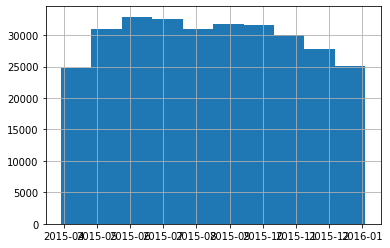

In [8]:
df["ClosedDate"].hist()

In [9]:
df['CreatedDate'].describe()

<ipython-input-9-eafe2836d066>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df['CreatedDate'].describe()


count                  300698
unique                 259493
top       2015-07-11 23:04:00
freq                        9
first     2015-03-29 00:33:01
last      2015-12-31 23:59:45
Name: CreatedDate, dtype: object

In [10]:
df['ClosedDate'].describe()

<ipython-input-10-b3ed9174048e>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df['ClosedDate'].describe()


count                  298534
unique                 237165
top       2015-11-08 07:34:00
freq                       24
first     2015-03-29 00:57:23
last      2016-01-03 16:22:00
Name: ClosedDate, dtype: object

In [11]:
#fill the Na close date with last closed date
df['ClosedDate'].fillna(value=df['ClosedDate'].mean(),inplace=True)
df['ClosedDate'] = pd.to_datetime(df['ClosedDate'])

In [12]:
# Creating a new column Request_closing_time
df['Request_Closing_Time'] = df['ClosedDate']- df['CreatedDate']

In [13]:
df.sort_values(by=['Request_Closing_Time'])

,UniqueKey,CreatedDate,ClosedDate,Agency,AgencyName,ComplaintType,Descriptor,LocationType,IncidentZip,IncidentAddress,...,SchoolPhoneNumber,SchoolAddress,SchoolCity,SchoolState,SchoolZip,SchoolNotFound,Latitude,Longitude,Location,Request_Closing_Time
416,32305700,2015-12-31 14:16:04,2015-08-14 13:22:22.715989248,NYPD,New York City Police Department,Illegal Parking,Posted Parking Sign Violation,Street/Sidewalk,NaN,5426-5526 90TH ST,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,-140 days +23:06:18.715989248
611,32309308,2015-12-31 09:58:06,2015-08-14 13:22:22.715989248,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,NaN,30 STREET,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,-139 days +03:24:16.715989248
1648,32303348,2015-12-30 05:13:42,2015-08-14 13:22:22.715989248,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,NaN,21600-2169 91ST AVE,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,-138 days +08:08:40.715989248
1816,32294519,2015-12-29 22:44:50,2015-08-14 13:22:22.715989248,NYPD,New York City Police Department,Derelict Vehicle,With License Plate,Street/Sidewalk,NaN,127 STREET,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,-138 days +14:37:32.715989248
1965,32296487,2015-12-29 19:09:13,2015-08-14 13:22:22.715989248,NYPD,New York City Police Department,Derelict Vehicle,With License Plate,Street/Sidewalk,NaN,5201-5299 68TH ST,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,-138 days +18:13:09.715989248
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300273,30287350,2015-03-29 14:40:19,2015-08-14 13:22:22.715989248,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,NaN,3801-3999 23RD AVE,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,137 days 22:42:03.715989248
300492,30284963,2015-03-29 08:50:15,2015-08-14 13:22:22.715989248,NYPD,New York City Police Department,Vending,Unlicensed,Street/Sidewalk,NaN,COOPER AVE,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,138 days 04:32:07.715989248
300496,30285492,2015-03-29 08:44:13,2015-08-14 13:22:22.715989248,NYPD,New York City Police Department,Vending,Unlicensed,Street/Sidewalk,NaN,80 STREET,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,138 days 04:38:09.715989248
300620,30282717,2015-03-29 01:55:35,2015-08-14 13:22:22.715989248,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,NaN,CRESCENT AVENUE,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,138 days 11:26:47.715989248


In [14]:
df['Request_Closing_Time']= df['Request_Closing_Time'].dt.total_seconds().div(60).astype(int)

In [15]:
df.sort_values(by=['Request_Closing_Time'])

,UniqueKey,CreatedDate,ClosedDate,Agency,AgencyName,ComplaintType,Descriptor,LocationType,IncidentZip,IncidentAddress,...,SchoolPhoneNumber,SchoolAddress,SchoolCity,SchoolState,SchoolZip,SchoolNotFound,Latitude,Longitude,Location,Request_Closing_Time
416,32305700,2015-12-31 14:16:04,2015-08-14 13:22:22.715989248,NYPD,New York City Police Department,Illegal Parking,Posted Parking Sign Violation,Street/Sidewalk,NaN,5426-5526 90TH ST,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,-200213
611,32309308,2015-12-31 09:58:06,2015-08-14 13:22:22.715989248,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,NaN,30 STREET,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,-199955
1648,32303348,2015-12-30 05:13:42,2015-08-14 13:22:22.715989248,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,NaN,21600-2169 91ST AVE,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,-198231
1816,32294519,2015-12-29 22:44:50,2015-08-14 13:22:22.715989248,NYPD,New York City Police Department,Derelict Vehicle,With License Plate,Street/Sidewalk,NaN,127 STREET,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,-197842
1965,32296487,2015-12-29 19:09:13,2015-08-14 13:22:22.715989248,NYPD,New York City Police Department,Derelict Vehicle,With License Plate,Street/Sidewalk,NaN,5201-5299 68TH ST,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,-197626
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300273,30287350,2015-03-29 14:40:19,2015-08-14 13:22:22.715989248,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,NaN,3801-3999 23RD AVE,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,198642
300492,30284963,2015-03-29 08:50:15,2015-08-14 13:22:22.715989248,NYPD,New York City Police Department,Vending,Unlicensed,Street/Sidewalk,NaN,COOPER AVE,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,198992
300496,30285492,2015-03-29 08:44:13,2015-08-14 13:22:22.715989248,NYPD,New York City Police Department,Vending,Unlicensed,Street/Sidewalk,NaN,80 STREET,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,198998
300620,30282717,2015-03-29 01:55:35,2015-08-14 13:22:22.715989248,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,NaN,CRESCENT AVENUE,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,199406


<AxesSubplot:>

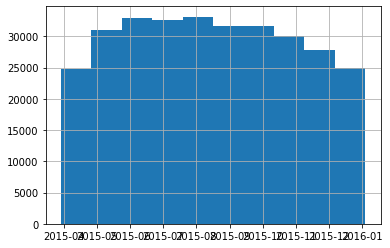

In [16]:
df["ClosedDate"].hist()

<AxesSubplot:>

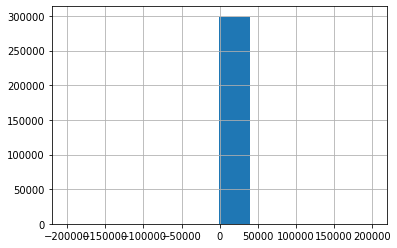

In [17]:
df["Request_Closing_Time"].hist()

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300698 entries, 0 to 300697
Data columns (total 40 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   UniqueKey                    300698 non-null  int64         
 1   CreatedDate                  300698 non-null  datetime64[ns]
 2   ClosedDate                   300698 non-null  datetime64[ns]
 3   Agency                       300698 non-null  object        
 4   AgencyName                   300698 non-null  object        
 5   ComplaintType                300698 non-null  object        
 6   Descriptor                   294784 non-null  object        
 7   LocationType                 300567 non-null  object        
 8   IncidentZip                  298083 non-null  float64       
 9   IncidentAddress              256288 non-null  object        
 10  StreetName                   256288 non-null  object        
 11  CrossStreet1              

In [19]:
df.nunique()

UniqueKey                      300698
CreatedDate                    259493
ClosedDate                     237166
Agency                              1
AgencyName                          3
ComplaintType                      24
Descriptor                         45
LocationType                       18
IncidentZip                       201
IncidentAddress                107652
StreetName                       7320
CrossStreet1                     5982
CrossStreet2                     5823
AddressType                         5
City                               53
FacilityType                        1
Status                              4
DueDate                        259851
ResolutionDescription              18
ResolutionActionUpdatedDate    237895
CommunityBoard                     75
Borough                             6
XCoordinate(StatePlane)         63226
YCoordinate(StatePlane)         73694
ParkFacilityName                    2
ParkBorough                         6
SchoolName  

In [20]:
#removing single category columns
df.drop(['Agency','FacilityType','SchoolNotFound','SchoolZip','SchoolCode','SchoolRegion'] , axis = 1 , inplace=True)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300698 entries, 0 to 300697
Data columns (total 34 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   UniqueKey                    300698 non-null  int64         
 1   CreatedDate                  300698 non-null  datetime64[ns]
 2   ClosedDate                   300698 non-null  datetime64[ns]
 3   AgencyName                   300698 non-null  object        
 4   ComplaintType                300698 non-null  object        
 5   Descriptor                   294784 non-null  object        
 6   LocationType                 300567 non-null  object        
 7   IncidentZip                  298083 non-null  float64       
 8   IncidentAddress              256288 non-null  object        
 9   StreetName                   256288 non-null  object        
 10  CrossStreet1                 251419 non-null  object        
 11  CrossStreet2              

In [22]:
df.nunique()

UniqueKey                      300698
CreatedDate                    259493
ClosedDate                     237166
AgencyName                          3
ComplaintType                      24
Descriptor                         45
LocationType                       18
IncidentZip                       201
IncidentAddress                107652
StreetName                       7320
CrossStreet1                     5982
CrossStreet2                     5823
AddressType                         5
City                               53
Status                              4
DueDate                        259851
ResolutionDescription              18
ResolutionActionUpdatedDate    237895
CommunityBoard                     75
Borough                             6
XCoordinate(StatePlane)         63226
YCoordinate(StatePlane)         73694
ParkFacilityName                    2
ParkBorough                         6
SchoolName                          2
SchoolNumber                        2
SchoolPhoneN

In [23]:
df['AgencyName'].value_counts()

New York City Police Department    300690
Internal Affairs Bureau                 6
NYPD                                    2
Name: AgencyName, dtype: int64

In [24]:
df['ParkFacilityName'].value_counts()

Unspecified                        300697
Alley Pond Park - Nature Center         1
Name: ParkFacilityName, dtype: int64

In [25]:
df['SchoolName'].value_counts()

Unspecified                        300697
Alley Pond Park - Nature Center         1
Name: SchoolName, dtype: int64

In [26]:
df['SchoolNumber'].value_counts()

Unspecified    300697
Q001                1
Name: SchoolNumber, dtype: int64

In [27]:
df['SchoolPhoneNumber'].value_counts()

Unspecified    300697
7182176034          1
Name: SchoolPhoneNumber, dtype: int64

In [28]:
df['SchoolAddress'].value_counts()

Unspecified                                     300697
Grand Central Parkway, near the soccer field         1
Name: SchoolAddress, dtype: int64

In [29]:
df['SchoolCity'].value_counts()

Unspecified    300697
QUEENS              1
Name: SchoolCity, dtype: int64

In [30]:
df['SchoolState'].value_counts()

Unspecified    300697
NY                  1
Name: SchoolState, dtype: int64

In [32]:
df.drop(['AgencyName','ParkFacilityName','SchoolName','SchoolNumber','SchoolPhoneNumber','SchoolAddress','SchoolCity','SchoolState'] , axis = 1 , inplace=True)

In [33]:
df.nunique()

UniqueKey                      300698
CreatedDate                    259493
ClosedDate                     237166
ComplaintType                      24
Descriptor                         45
LocationType                       18
IncidentZip                       201
IncidentAddress                107652
StreetName                       7320
CrossStreet1                     5982
CrossStreet2                     5823
AddressType                         5
City                               53
Status                              4
DueDate                        259851
ResolutionDescription              18
ResolutionActionUpdatedDate    237895
CommunityBoard                     75
Borough                             6
XCoordinate(StatePlane)         63226
YCoordinate(StatePlane)         73694
ParkBorough                         6
Latitude                       125122
Longitude                      125216
Location                       126048
Request_Closing_Time             5170
dtype: int64

In [34]:
df['Status'].value_counts()

Closed      298471
Open          1439
Assigned       786
Draft            2
Name: Status, dtype: int64

In [35]:
df['Borough'].value_counts()

BROOKLYN         98307
QUEENS           80641
MANHATTAN        66131
BRONX            40702
STATEN ISLAND    12343
Unspecified       2574
Name: Borough, dtype: int64

In [36]:
df['ParkBorough'].value_counts()

BROOKLYN         98307
QUEENS           80641
MANHATTAN        66131
BRONX            40702
STATEN ISLAND    12343
Unspecified       2574
Name: ParkBorough, dtype: int64

In [37]:
df['AddressType'].value_counts()

ADDRESS         238644
INTERSECTION     43366
BLOCKFACE        12014
LATLONG           3509
PLACENAME          350
Name: AddressType, dtype: int64

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300698 entries, 0 to 300697
Data columns (total 26 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   UniqueKey                    300698 non-null  int64         
 1   CreatedDate                  300698 non-null  datetime64[ns]
 2   ClosedDate                   300698 non-null  datetime64[ns]
 3   ComplaintType                300698 non-null  object        
 4   Descriptor                   294784 non-null  object        
 5   LocationType                 300567 non-null  object        
 6   IncidentZip                  298083 non-null  float64       
 7   IncidentAddress              256288 non-null  object        
 8   StreetName                   256288 non-null  object        
 9   CrossStreet1                 251419 non-null  object        
 10  CrossStreet2                 250919 non-null  object        
 11  AddressType               

In [39]:
complainsNo = df[['CreatedDate','UniqueKey']].groupby(pd.Grouper(key='CreatedDate', freq='1M')).count().sort_values('CreatedDate')

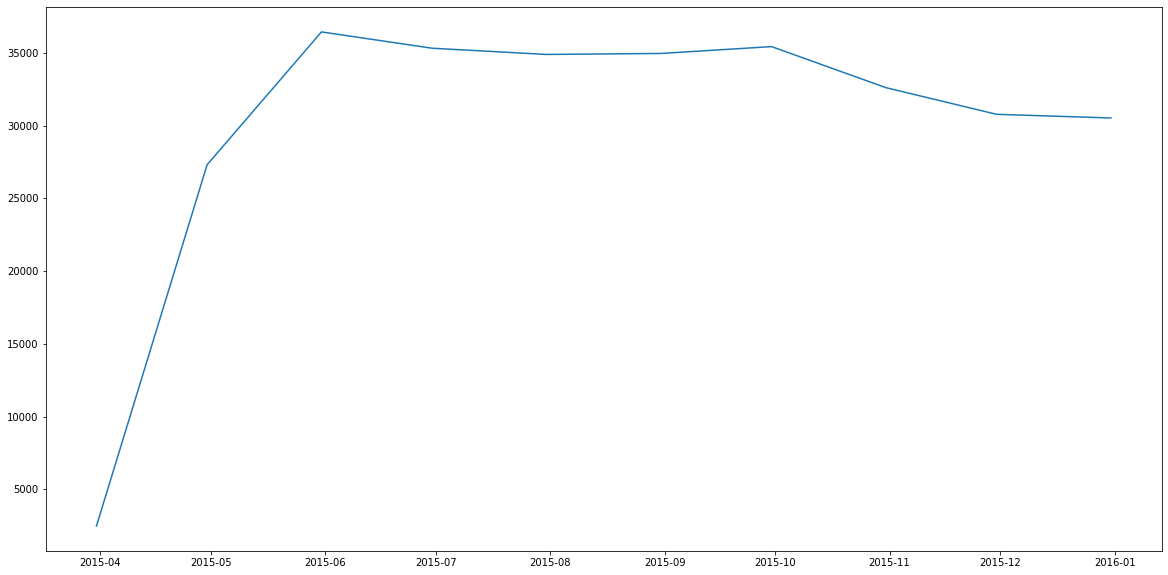

In [40]:
plt.subplots(figsize=(20,10))
plt.plot(complainsNo)

In [41]:
complainsCat = df[['UniqueKey','ComplaintType']].groupby(pd.Grouper(key='ComplaintType')).count().sort_values('UniqueKey', ascending=False)
complainsCat

,UniqueKey
ComplaintType,
Blocked Driveway,77044
Illegal Parking,75361
Noise - Street/Sidewalk,48612
Noise - Commercial,35577
Derelict Vehicle,17718
Noise - Vehicle,17083
Animal Abuse,7778
Traffic,4498
Homeless Encampment,4416


In [42]:
complainsCat.reset_index(level=0, inplace=True)
complainsCat

,ComplaintType,UniqueKey
0,Blocked Driveway,77044
1,Illegal Parking,75361
2,Noise - Street/Sidewalk,48612
3,Noise - Commercial,35577
4,Derelict Vehicle,17718
5,Noise - Vehicle,17083
6,Animal Abuse,7778
7,Traffic,4498
8,Homeless Encampment,4416
9,Noise - Park,4042


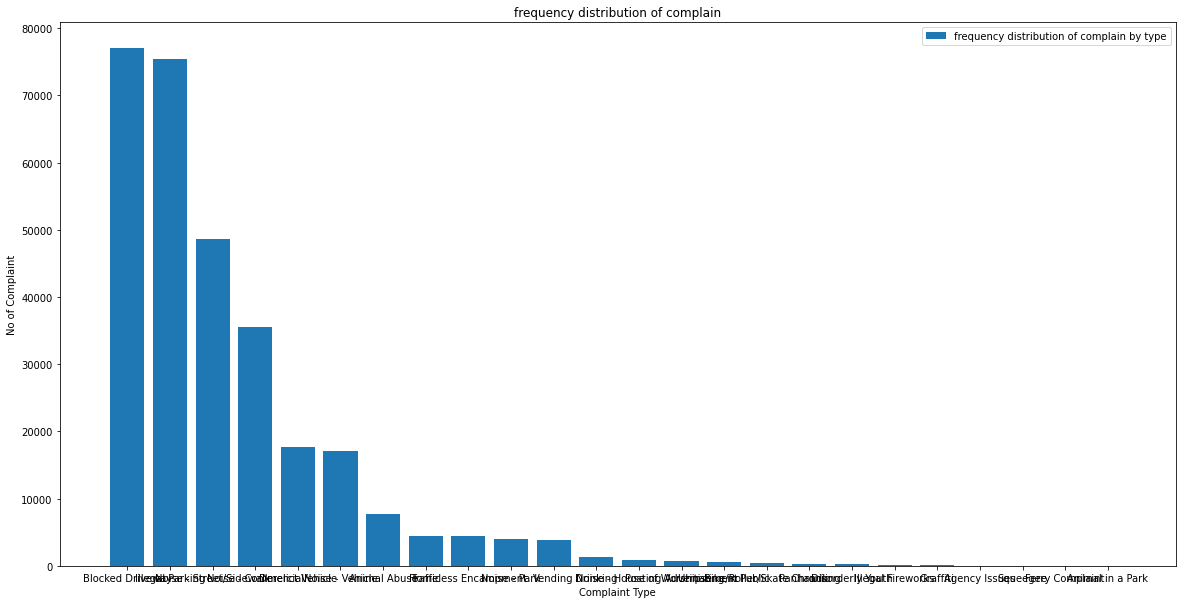

In [43]:
plt.subplots(figsize=(20,10))
plt.bar(complainsCat['ComplaintType'],complainsCat['UniqueKey'], label="frequency distribution of complain by type")
plt.ylabel("No of Complaint")
plt.xlabel("Complaint Type")
plt.title('frequency distribution of complain')
plt.legend();

In [44]:
complainsBorough = df[['UniqueKey','Borough']].groupby(pd.Grouper(key='Borough')).count().sort_values('UniqueKey', ascending=False)
complainsBorough

,UniqueKey
Borough,
BROOKLYN,98307
QUEENS,80641
MANHATTAN,66131
BRONX,40702
STATEN ISLAND,12343
Unspecified,2574


In [45]:
complainsBorough.reset_index(level=0, inplace=True)
complainsBorough

,Borough,UniqueKey
0,BROOKLYN,98307
1,QUEENS,80641
2,MANHATTAN,66131
3,BRONX,40702
4,STATEN ISLAND,12343
5,Unspecified,2574


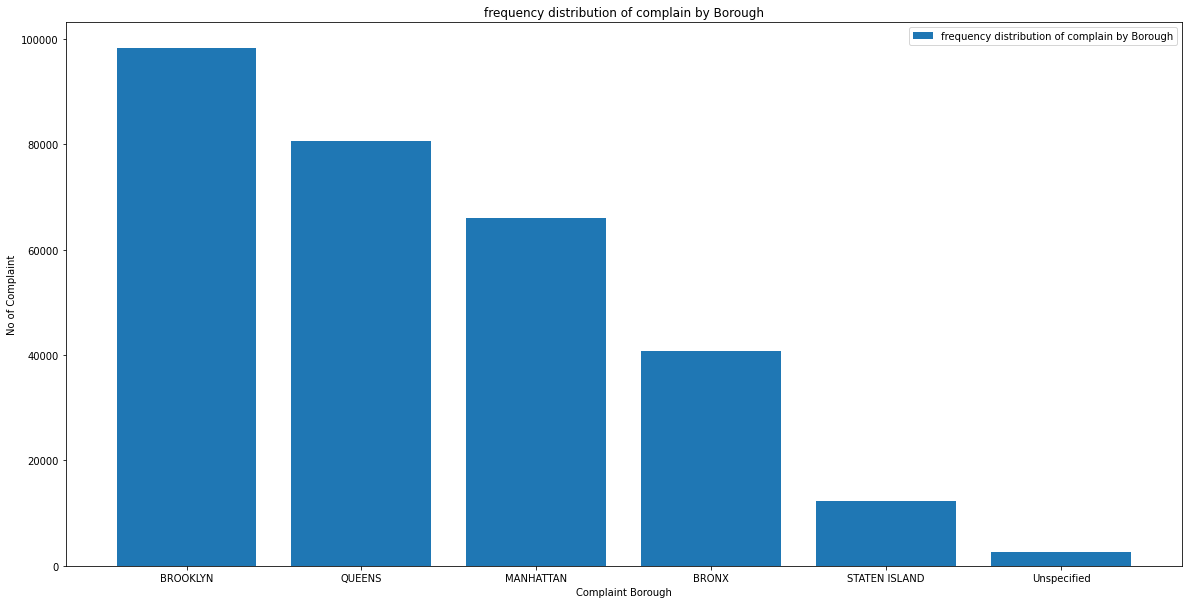

In [46]:
plt.subplots(figsize=(20,10))
plt.bar(complainsBorough['Borough'],complainsBorough['UniqueKey'], label="frequency distribution of complain by Borough")
plt.ylabel("No of Complaint")
plt.xlabel("Complaint Borough")
plt.title('frequency distribution of complain by Borough')
plt.legend();

In [47]:
complainsStatus = df[['UniqueKey','Status']].groupby(pd.Grouper(key='Status')).count().sort_values('UniqueKey', ascending=False)
complainsStatus

,UniqueKey
Status,
Closed,298471
Open,1439
Assigned,786
Draft,2


In [48]:
complainsStatus.reset_index(level=0, inplace=True)
complainsStatus

,Status,UniqueKey
0,Closed,298471
1,Open,1439
2,Assigned,786
3,Draft,2


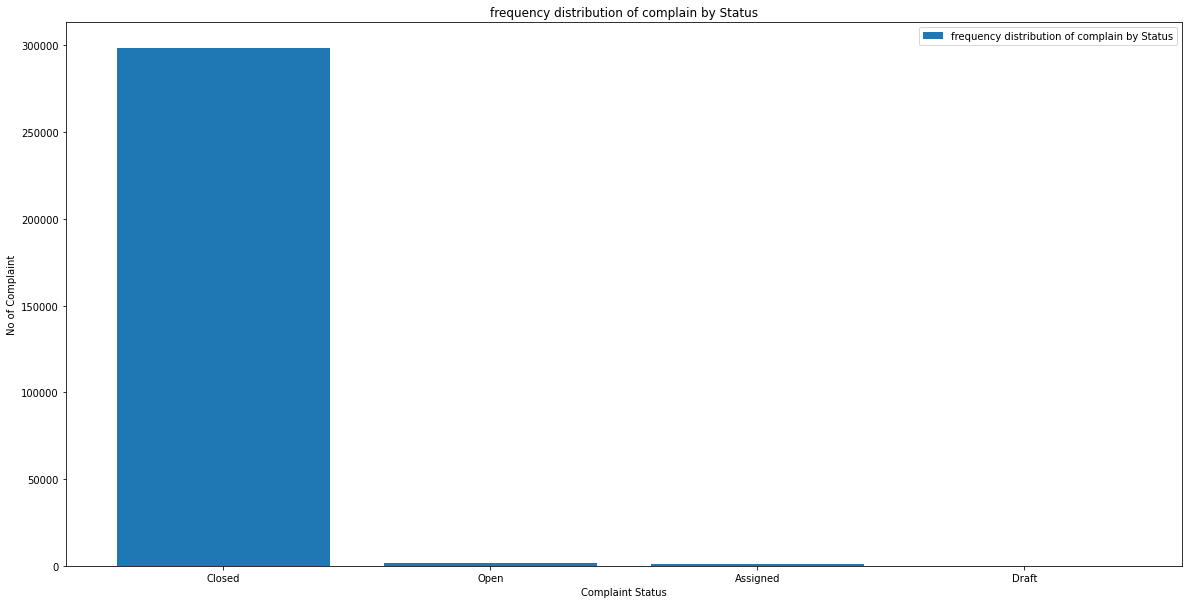

In [49]:
plt.subplots(figsize=(20,10))
plt.bar(complainsStatus['Status'],complainsStatus['UniqueKey'], label="frequency distribution of complain by Status")
plt.ylabel("No of Complaint")
plt.xlabel("Complaint Status")
plt.title('frequency distribution of complain by Status')
plt.legend();

In [50]:
df.City.describe()

count       298084
unique          53
top       BROOKLYN
freq         98307
Name: City, dtype: object

In [51]:
df.City.value_counts()

BROOKLYN               98307
NEW YORK               65994
BRONX                  40702
STATEN ISLAND          12343
JAMAICA                 7296
ASTORIA                 6330
FLUSHING                5971
RIDGEWOOD               5163
CORONA                  4295
WOODSIDE                3544
SOUTH RICHMOND HILL     2774
OZONE PARK              2755
EAST ELMHURST           2734
ELMHURST                2673
WOODHAVEN               2464
MASPETH                 2462
LONG ISLAND CITY        2437
SOUTH OZONE PARK        2173
RICHMOND HILL           1904
FRESH MEADOWS           1899
QUEENS VILLAGE          1814
MIDDLE VILLAGE          1765
JACKSON HEIGHTS         1689
FOREST HILLS            1688
REGO PARK               1486
BAYSIDE                 1221
COLLEGE POINT           1220
FAR ROCKAWAY            1179
WHITESTONE              1098
HOLLIS                  1012
HOWARD BEACH             931
ROSEDALE                 922
SPRINGFIELD GARDENS      883
SAINT ALBANS             834
KEW GARDENS   

In [52]:
complainsTypeBor = df[['Request_Closing_Time','ComplaintType','Borough']].groupby(['ComplaintType','Borough']).mean().round().sort_values('ComplaintType', ascending=False)
complainsTypeBor

Request_Closing_Time
ComplaintType Borough                            
Vending       Unspecified                 58752.0
              STATEN ISLAND                 256.0
              QUEENS                        286.0
              MANHATTAN                     208.0
              BROOKLYN                      271.0
...                                           ...
Animal Abuse  MANHATTAN                     221.0
              BRONX                         440.0
              STATEN ISLAND                 298.0
              Unspecified                -31965.0
Agency Issues Unspecified                   315.0

[119 rows x 1 columns]

<AxesSubplot:xlabel='ComplaintType'>

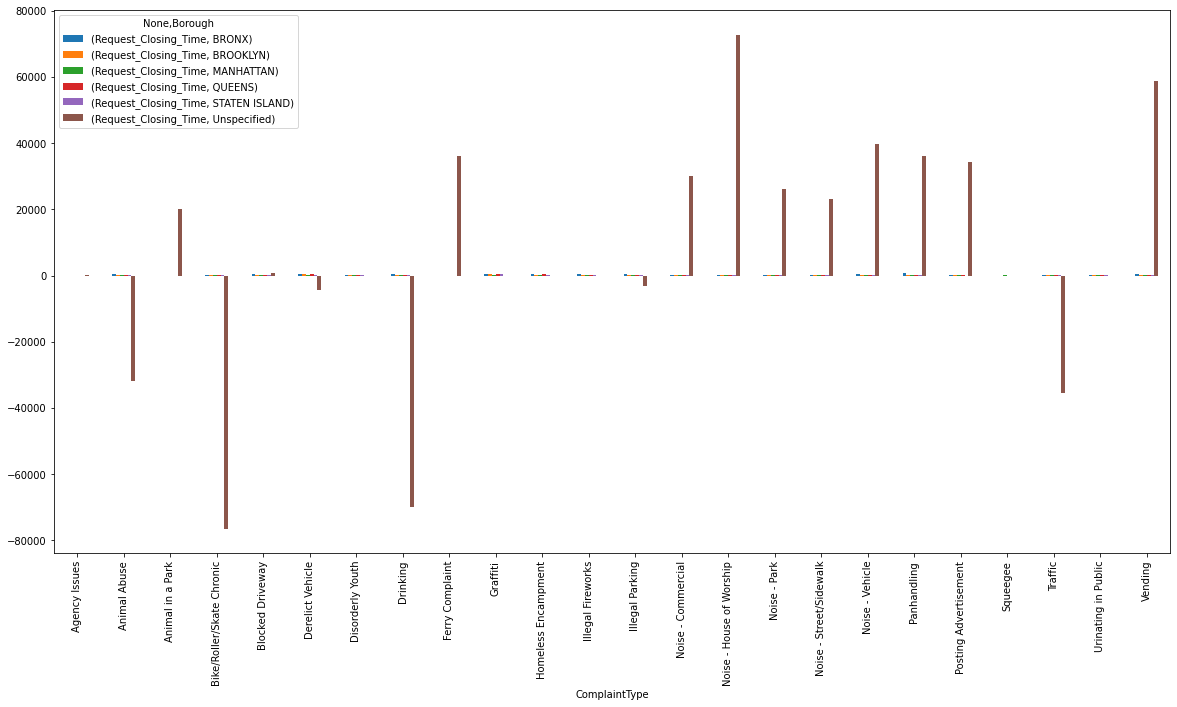

In [53]:
complainsTypeBor.unstack()
complainsTypeBor.unstack().plot(kind='bar', figsize=(20,10) )

In [54]:
complainsResp = df[['ComplaintType','Request_Closing_Time']].groupby(pd.Grouper(key='Request_Closing_Time')).count().sort_values('ComplaintType')

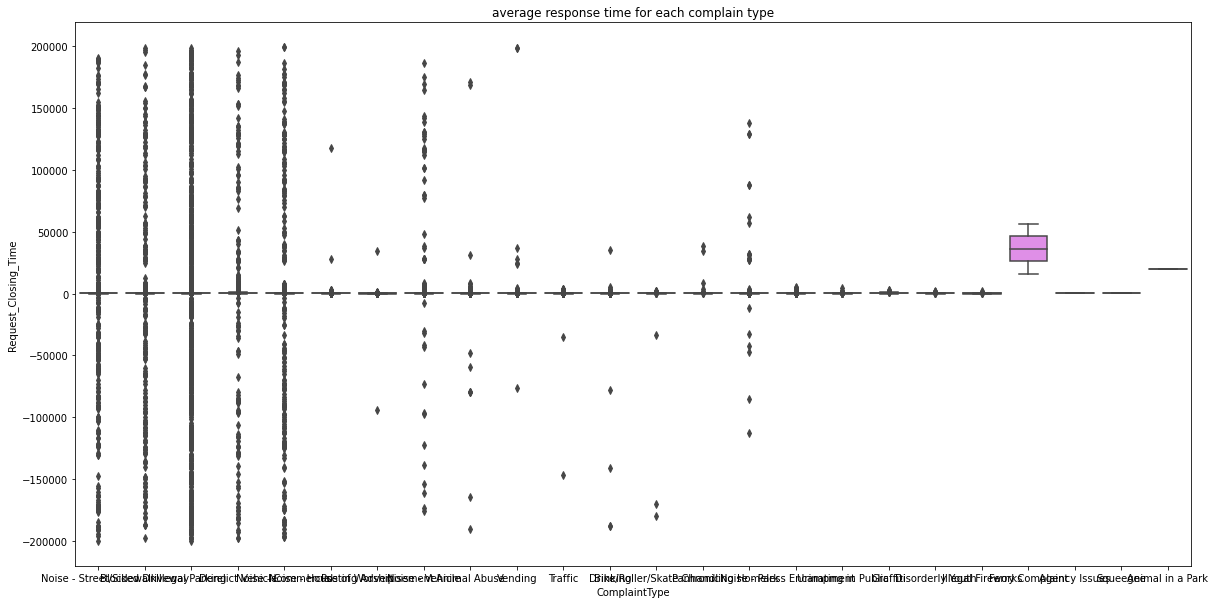

In [55]:
plt.subplots(figsize=(20,10))
sns.boxplot(x = df["ComplaintType"], y = df["Request_Closing_Time"], data = complainsResp)
plt.title('average response time for each complain type')
plt.show()

### Step 1: State the null and alternative hypothesis:

* $H_0$: $\mu1$ = $\mu2$ = $\mu3$=  ......  =$\mu$n
* $H_A$: At least one $\mu$ differs 

Here $\mu1$, $\mu2$ and $\mu3$ are the mean Request_Closing_Time taken to resolve the Complaint by Each Complaint type respectively.

### Step 2: Decide the significance level

Here we select α = 0.05

### Step 3: Identify the test statistic

Here we have 24 groups. Analysis of variance can determine whether the means of three or more groups are different. ANOVA uses F-tests to statistically test the equality of means.

### Step 4: Calculate p value using ANOVA table

* statsmodels.formula.api.ols creates a model from a formula and dataframe
* statsmodels.api.sm.stats.anova_lm gives an Anova table for one or more fitted linear models

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300698 entries, 0 to 300697
Data columns (total 26 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   UniqueKey                    300698 non-null  int64         
 1   CreatedDate                  300698 non-null  datetime64[ns]
 2   ClosedDate                   300698 non-null  datetime64[ns]
 3   ComplaintType                300698 non-null  object        
 4   Descriptor                   294784 non-null  object        
 5   LocationType                 300567 non-null  object        
 6   IncidentZip                  298083 non-null  float64       
 7   IncidentAddress              256288 non-null  object        
 8   StreetName                   256288 non-null  object        
 9   CrossStreet1                 251419 non-null  object        
 10  CrossStreet2                 250919 non-null  object        
 11  AddressType               

In [57]:
mod = ols('Request_Closing_Time ~ ComplaintType', data = df ).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

                     sum_sq        df         F        PR(>F)
ComplaintType  6.882068e+09      23.0  3.742483  3.218070e-09
Residual       2.403960e+13  300674.0       NaN           NaN


### Step 5:  Decide to reject or accept null hypothesis
In this example, p value is 3.218e-09 and it is less than our chosen level of signifance at 5%

So the statistical decision is to reject the null hypothesis at 5% level of significance.

### So there is  sufficient evidence  to reject the null hypothesis that at least one mean time taken to resolve the complaints is different from others .

In [58]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
print(pairwise_tukeyhsd(df['Request_Closing_Time'], df['ComplaintType']))

                         Multiple Comparison of Means - Tukey HSD, FWER=0.05                         
          group1                    group2            meandiff  p-adj     lower       upper    reject
-----------------------------------------------------------------------------------------------------
            Agency Issues              Animal Abuse    -48.4784    0.9 -13331.6098   13234.653  False
            Agency Issues          Animal in a Park  19894.6667    0.9 -15235.6484  55024.9817  False
            Agency Issues Bike/Roller/Skate Chronic   -988.2467    0.9 -14359.2204   12382.727  False
            Agency Issues          Blocked Driveway    -32.6123    0.9 -13311.1403  13245.9157  False
            Agency Issues          Derelict Vehicle     71.6594    0.9 -13208.5997  13351.9184  False
            Agency Issues          Disorderly Youth   -102.1655    0.9 -13518.7334  13314.4024  False
            Agency Issues                  Drinking   -522.2208    0.9 -13831.3158

### Chi-square tests of independence

Chi-square test of independence is a hypothesis test in which we test whether two or more groups are statistically independent or not.

| Hypothesis | Description |
| --------------------- | ----------------------- |
| Null Hypothesis | Two or more groups are independent |
| Alternative Hypothesis | Two or more groups are dependent |

### Step 1: State the null and alternative hypothesis:

Null hypothesis: $H_0$: There is no difference in the type of complaint or service requested and location
                        
Alternative hypothesis: $H_A$: There is a significant difference in the type of complaint or service requested and location

### Step 2: Decide the significance level

Here we select α = 0.05

### Step 3: Identify the test statistic

We use the chi-square test of independence to find out the difference of categorical variables 

### Step 4: Calculate p value or chi-square statistic value

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300698 entries, 0 to 300697
Data columns (total 26 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   UniqueKey                    300698 non-null  int64         
 1   CreatedDate                  300698 non-null  datetime64[ns]
 2   ClosedDate                   300698 non-null  datetime64[ns]
 3   ComplaintType                300698 non-null  object        
 4   Descriptor                   294784 non-null  object        
 5   LocationType                 300567 non-null  object        
 6   IncidentZip                  298083 non-null  float64       
 7   IncidentAddress              256288 non-null  object        
 8   StreetName                   256288 non-null  object        
 9   CrossStreet1                 251419 non-null  object        
 10  CrossStreet2                 250919 non-null  object        
 11  AddressType               

In [60]:
dfn = pd.crosstab(df.ComplaintType, df.Borough, margins=True)
dfn

Borough,BRONX,BROOKLYN,MANHATTAN,QUEENS,STATEN ISLAND,Unspecified,All
ComplaintType,,,,,,,
Agency Issues,0,0,0,0,0,6,6
Animal Abuse,1415,2394,1525,1876,557,11,7778
Animal in a Park,0,0,0,0,0,1,1
Bike/Roller/Skate Chronic,20,111,225,59,7,5,427
Blocked Driveway,12755,28148,2073,31644,2142,282,77044
Derelict Vehicle,1953,5181,537,8110,1766,171,17718
Disorderly Youth,63,72,69,59,23,0,286
Drinking,188,257,295,357,175,8,1280
Ferry Complaint,0,0,0,0,0,2,2


In [61]:
chi_sq_Stat, p_value, deg_freedom, exp_freq = stats.chi2_contingency(dfn)

print('Chi-square statistic %3.5f P value %1.6f Degrees of freedom %d' %(chi_sq_Stat, p_value,deg_freedom))

Chi-square statistic 79641.55786 P value 0.000000 Degrees of freedom 144


### Step 5: Decide to reject or accept null hypothesis

### In this case, p value is 0.0000 and < 0.05 so we reject the null hypothesis. 
### So, we conclude that there is a significant difference in the type of complaint or service requested and location